# Data Preparation
- This notebook has not considered in dropping duplicates / handling missing value imputation
- Unprocessed columns are:
    - RCRI score
    - Preoptransfusionwithin30days
    - Intraop
    - Postopwithin30days
    - TransfusionIntraandpostopCategory
    - Transfusionintraandpostop
    - AnaestypeCategory

In [82]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
tqdm.pandas()

In [83]:
cares_data_path = "https://github.com/ISSS623-AHA/ISSS623_2024/raw/main/Group_Project/Group_Project-SGH/CARES_data.xlsx"
cares = pd.read_excel(cares_data_path, "Sheet1")
cares.head()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,2,48.0,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0.0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,5,36.0,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,6,64.0,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,9,73.0,MALE,NaN,moderate,117.231496,g1,NaN,NO,0.0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,10,73.0,MALE,0.0,mild,98.651255,g1,59.0,NO,0.0,...,no,no,no,no,no,G1,Mild,>15.7,II,no


In [84]:
cares.tail()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
90783,121198,63.0,FEMALE,0.0,NaN,NaN,BLANK,NaN,NO,0.0,...,no,no,no,no,no,#NULL!,#NULL!,#NULL!,II,no
90784,121200,45.0,FEMALE,0.0,mild,125.902498,g1,NaN,NO,0.0,...,no,no,no,no,no,G1,Mild,<= 15.7,II,no
90785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90787,? Duplicates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
cares.shape

(90788, 32)

In [86]:
cares.columns

Index(['Indexno', 'AGE', 'GENDER', 'RCRI score', 'Anemia category',
       'PreopEGFRMDRD', 'GradeofKidneydisease', 'DaysbetweenDeathandoperation',
       '@30daymortality', 'Preoptransfusionwithin30days', 'Intraop',
       'Postopwithin30days', 'Transfusionintraandpostop', 'AnaestypeCategory',
       'PriorityCategory', 'TransfusionIntraandpostopCategory', 'AGEcategory',
       'AGEcategoryOriginal', 'Mortality', 'thirtydaymortality',
       'SurgRiskCategory', 'RaceCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory',
       'Anemiacategorybinned', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h'],
      dtype='object')

## EDA

In [87]:
# remove the last 3 rows because there's a weird "? Duplicates" cell on the excel file
cares.drop(cares.index[-3:], axis=0, inplace=True)
cares.tail()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
90780,121192,66.0,FEMALE,2.0,mild,48.339582,G3a,NaN,NO,0.0,...,no,no,no,yes,no,G3,Mild,<= 15.7,II,no
90781,121194,50.0,MALE,1.0,moderate,126.592489,g1,NaN,NO,0.0,...,no,no,no,yes,no,G1,Moderate/Severe,<= 15.7,#NULL!,no
90782,121197,58.0,FEMALE,NaN,none,86.306771,G2,NaN,NO,0.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G2,NaN,<= 15.7,#NULL!,no
90783,121198,63.0,FEMALE,0.0,NaN,NaN,BLANK,NaN,NO,0.0,...,no,no,no,no,no,#NULL!,#NULL!,#NULL!,II,no
90784,121200,45.0,FEMALE,0.0,mild,125.902498,g1,NaN,NO,0.0,...,no,no,no,no,no,G1,Mild,<= 15.7,II,no


In [88]:
# drop index number
cares.drop("Indexno", axis=1, inplace=True)

In [89]:
cares.shape

(90785, 31)

In [90]:

cares.describe()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,63361.000000,79955.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,52.253225,0.322296,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,17.087307,0.634789,33.954241,421.866740,0.405840,0.230455,0.260728,0.395623
min,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,79.078715,121.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,96.398561,355.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,1.000000,114.310169,746.000000,0.000000,0.000000,0.000000,0.000000
max,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


In [91]:
cares.isna().describe()

,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
count,90785,90785,90785,90785,90785,90785,90785,90785,90785,90785,...,90785,90785,90785,90785,90785,90785,90785,90785,90785,90785
unique,1,1,2,2,2,1,2,1,1,1,...,1,1,1,1,1,1,2,1,1,1
top,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
freq,90785,90785,63361,86747,79955,90785,85190,90785,90785,90785,...,90785,90785,90785,90785,90785,90785,62878,90785,90785,90785


Check Missing values

**Note**: the paper got 79914 rows after cleaning missing values but we seem to cannot replicate this number

In [92]:
for column_name in cares.columns:
    print(cares[column_name].value_counts())
    print(cares[column_name].isna().value_counts())
    print()

AGE
61.0     2104
65.0     2103
64.0     2033
63.0     1999
60.0     1989
         ... 
99.0        4
100.0       2
102.0       1
101.0       1
103.0       1
Name: count, Length: 86, dtype: int64
AGE
False    90785
Name: count, dtype: int64

GENDER
FEMALE    48708
MALE      42077
Name: count, dtype: int64
GENDER
False    90785
Name: count, dtype: int64

RCRI score
0.0    47385
1.0    12653
2.0     2441
3.0      679
4.0      168
5.0       33
6.0        2
Name: count, dtype: int64
RCRI score
False    63361
True     27424
Name: count, dtype: int64

Anemia category
none        62878
mild        13006
moderate    10439
severe        424
Name: count, dtype: int64
Anemia category
False    86747
True      4038
Name: count, dtype: int64

PreopEGFRMDRD
104.452527    50
105.027160    49
104.657013    46
111.268426    46
95.529518     45
              ..
54.267341      1
46.530834      1
14.005128      1
44.728352      1
38.424462      1
Name: count, Length: 14893, dtype: int64
PreopEGFRMDRD
False

In [93]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
# early profiling
profile = ProfileReport(cares)
profile.to_file(output_file='../output/pre_processed_data_profile.html')

## Data Cleaning

Drop the exact duplicates if exist

In [ ]:
# cares.drop_duplicates(inplace=True)

In [ ]:
cares.shape

### Labels
- @30daymortality
- thirtydaymortality
- Mortality
- DaysbetweenDeathandoperation
- ICUAdmgt24h

check if these 2 labels 30 days mortality are the same

In [ ]:
cares["@30daymortality"] = cares["@30daymortality"] == "YES"
cares["thirtydaymortality"] = cares["thirtydaymortality"] == "Yes"

In [ ]:
any(cares["@30daymortality"] == cares["thirtydaymortality"])

In [ ]:
cares.drop("@30daymortality", axis=1, inplace=True)

^ Exactly the same. Can drop one

In [ ]:
cares["DaysbetweenDeathandoperation"].describe()

^ from 2012-01-01 to 2016-10-31 is only 1765 days. But some days are more than this number

In [ ]:
cares["ICUAdmgt24h"].value_counts()

In [ ]:
cares["ICUAdmgt24h"].isna().value_counts()

### Features

In [ ]:
cares.columns

#### Age
make binning on age, making sure match with the paper. Use the same binning as the paper suggest

In [ ]:
cares["AGE"].describe()

In [ ]:
cares["AGEcategoryOriginal"].value_counts().sort_index()

In [ ]:
cares["AGEcategory"].value_counts().sort_index()

In [ ]:
cares.drop(["AGE", "AGEcategoryOriginal"], axis=1, inplace=True)

#### Gender
No need to do anything about gender

In [ ]:
cares["GENDER"].value_counts().sort_index()

#### Race

In [ ]:
cares["RaceCategory"].value_counts().sort_index()

In [ ]:
# change the NULL to NaN
cares["RaceCategory"].replace('#NULL!', "Others", inplace=True)
cares["RaceCategory"].value_counts().sort_index()

In [ ]:
cares["RaceCategory"].isna().value_counts()

#### ASA Classification

In [ ]:
cares["ASAcategorybinned"].value_counts().sort_index()

In [ ]:
# change the NULL to NaN
cares["ASAcategorybinned"].replace('#NULL!',np.nan,inplace=True)
cares["ASAcategorybinned"].value_counts().sort_index()

In [ ]:
cares["ASAcategorybinned"].isna().value_counts()

In [ ]:
cares["AnaestypeCategory"].value_counts()

#### Anemia
There are 2 columns for anemia, make sure they're the same first

In [ ]:
cares["Anemia category"].value_counts()

In [ ]:
cares["Anemiacategorybinned"].value_counts()

In [ ]:
print(all((cares["Anemia category"] == "mild").index == (cares["Anemiacategorybinned"] == "Mild").index))
print(all((cares["Anemia category"].isin(["moderate", "severe"])).index == (cares["Anemiacategorybinned"] == "Moderate/Severe").index))

After checking:
- make `moderate` and `severe` in one category
    - we agree on combining `moderate` and `severe` in 1 class because they equally need treatment in comparison to `none` and `mild`
- remove `Anemiacategorybinned` column

Because Anemia is ordinal data, can later convert them using labelencoding =
```JSON
{
    "none": 0,
    "mild": 1,
    "moderate/severe": 2
}
```

In [ ]:
cares["Anemia category"].replace('moderate', 'moderate/severe', inplace=True)
cares["Anemia category"].replace('severe', 'moderate/severe', inplace=True)

In [ ]:
cares["Anemia category"].value_counts()

In [ ]:
cares.drop("Anemiacategorybinned", axis=1, inplace=True)

#### RDW

In [ ]:
cares["RDW15.7"].value_counts()

In [ ]:
cares["RDW15.7"].replace('#NULL!', np.nan, inplace=True)
cares["RDW15.7"].value_counts()

#### Grade of CKD

Source: https://www.kidney.org/professionals/explore-your-knowledge/how-to-classify-ckd

In [ ]:
cares["GradeofKidneyCategory"].value_counts()

In [ ]:
cares["GradeofKidneyCategory"].replace('#NULL!', np.nan, inplace=True)
cares["GradeofKidneyCategory"].value_counts()

In [ ]:
cares[cares["GradeofKidneyCategory"].isna()]["AGEcategory"].value_counts().sort_index()

In [ ]:
cares["GradeofKidneydisease"].value_counts()

In [ ]:
cares.drop("GradeofKidneydisease", axis=1, inplace=True)

#### CVA

RCRI stands for "Revised Cardiac Risk Index". According to the paper, NULL here means the same as no.


"NULL" here is assumed as "not tested". It is assumed as not tested because they are not susceptible of the risk, that's why we combine the "NULL" and the "no" class together

In [ ]:
cares["CVARCRICategory"].value_counts()

In [ ]:
cares["CVARCRICategory"].replace('#NULL!', 'no', inplace=True)
cares["CVARCRICategory"].value_counts()

#### IHD

In [ ]:
cares["IHDRCRICategory"].value_counts()

In [ ]:
cares["IHDRCRICategory"].replace('#NULL!', 'no', inplace=True)
cares["IHDRCRICategory"].value_counts()

#### CHF

In [ ]:
cares["CHFRCRICategory"].value_counts()

In [ ]:
cares["CHFRCRICategory"].replace('#NULL!', 'no', inplace=True)
cares["CHFRCRICategory"].value_counts()

#### DM on Insulin

In [ ]:
cares["DMinsulinRCRICategory"].value_counts()

In [ ]:
cares["DMinsulinRCRICategory"].replace('#NULL!', 'no', inplace=True)
cares["DMinsulinRCRICategory"].value_counts()

#### Creatinine

In [ ]:
cares["CreatinineRCRICategory"].value_counts()

In [ ]:
cares["CreatinineRCRICategory"].replace('#NULL!', 'no', inplace=True)
cares["CreatinineRCRICategory"].value_counts()

#### Surgical Risk
No need to do anything

In [ ]:
cares["SurgRiskCategory"].value_counts()

In [ ]:
cares["SurgRiskCategory"].isna().value_counts()

#### Priority of Surgery
No need to do anything

In [ ]:
cares["PriorityCategory"].value_counts()

In [ ]:
cares["PriorityCategory"].isna().value_counts()

In [ ]:
cares.head()

In [ ]:
# post-processing profiling
profile = ProfileReport(cares)
profile.to_file(output_file='../output/post_processed_data_profile.html')

## Save as CSV

In [ ]:
cares.to_csv("../data/CARES_dataset_clean.csv", index=False)

## Data Preparation (Part II)
- Drop duplicated records
- Missing value imputation 
- Feature Engineering

**Research Papers**

**Justifications**

In [2]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
from duckdb import sql

In [3]:
# Import dataset
data = pd.read_csv("../data/CARES_dataset_clean.csv")

In [4]:
len(data)

90785

In [6]:
# Find duplicated records
duplicated_records = data[data.duplicated()]

# Print sample duplicated records (default is first 5)
sample_duplicated_records = duplicated_records.head()

# Display the sample duplicated records
print("Sample duplicated records:")
sample_duplicated_records

Sample duplicated records:


,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h
273,MALE,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,GA,...,Others,no,no,no,no,no,NaN,NaN,NaN,no
318,MALE,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,GA,...,Others,no,no,no,no,no,NaN,NaN,I,no
392,MALE,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,GA,...,Others,no,no,no,no,no,NaN,NaN,NaN,no
421,FEMALE,0.0,none,NaN,NaN,0.0,0.0,0.0,0.0,GA,...,Chinese,no,no,no,no,no,NaN,<= 15.7,I,no
490,FEMALE,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,GA,...,Chinese,no,no,no,no,no,NaN,NaN,I,no


### Drop duplicated cols

In [311]:
# Remove duplicated records with respect to all columns
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)

In [312]:
len(data)

73201

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73201 entries, 0 to 73200
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GENDER                             73201 non-null  object 
 1   RCRI score                         50370 non-null  float64
 2   Anemia category                    72216 non-null  object 
 3   PreopEGFRMDRD                      70069 non-null  float64
 4   DaysbetweenDeathandoperation       5595 non-null   float64
 5   Preoptransfusionwithin30days       73201 non-null  float64
 6   Intraop                            73201 non-null  float64
 7   Postopwithin30days                 73201 non-null  float64
 8   Transfusionintraandpostop          73201 non-null  float64
 9   AnaestypeCategory                  73201 non-null  object 
 10  PriorityCategory                   73201 non-null  object 
 11  TransfusionIntraandpostopCategory  73201 non-null  obj

In [314]:
# Define categorical, numeric & target columns
# Define the target columns
target_cols = ['ICUAdmgt24h', 'thirtydaymortality', 'Mortality']

# Select categorical columns and exclude target columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols = [col for col in cat_cols if col not in target_cols]

# Select numerical columns and exclude target columns
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col not in target_cols]

In [315]:
cat_cols

['GENDER',
 'Anemia category',
 'AnaestypeCategory',
 'PriorityCategory',
 'TransfusionIntraandpostopCategory',
 'AGEcategory',
 'SurgRiskCategory',
 'RaceCategory',
 'CVARCRICategory',
 'IHDRCRICategory',
 'CHFRCRICategory',
 'DMinsulinRCRICategory',
 'CreatinineRCRICategory',
 'GradeofKidneyCategory',
 'RDW15.7',
 'ASAcategorybinned']

In [316]:
num_cols

['RCRI score',
 'PreopEGFRMDRD',
 'DaysbetweenDeathandoperation',
 'Preoptransfusionwithin30days',
 'Intraop',
 'Postopwithin30days',
 'Transfusionintraandpostop']

In [317]:
target_cols

['ICUAdmgt24h', 'thirtydaymortality', 'Mortality']

### Review missing data %

In [318]:
# Function to calculate the percentage of missing data for given columns
def calculate_missing_data_percentage(data, columns):
    missing_data = data[columns].isnull().mean() * 100
    return missing_data

# Calculate the percentage of missing data for target columns
missing_target_cols = calculate_missing_data_percentage(data, target_cols)
print("Percentage of missing data in target columns:")
print(missing_target_cols)

# Calculate the percentage of missing data for categorical columns
missing_cat_cols = calculate_missing_data_percentage(data, cat_cols)
print("\nPercentage of missing data in categorical columns:")
print(missing_cat_cols)

# Calculate the percentage of missing data for numerical columns
missing_num_cols = calculate_missing_data_percentage(data, num_cols)
print("\nPercentage of missing data in numerical columns:")
print(missing_num_cols)

Percentage of missing data in target columns:
ICUAdmgt24h           0.0
thirtydaymortality    0.0
Mortality             0.0
dtype: float64

Percentage of missing data in categorical columns:
GENDER                               0.000000
Anemia category                      1.345610
AnaestypeCategory                    0.000000
PriorityCategory                     0.000000
TransfusionIntraandpostopCategory    0.000000
AGEcategory                          0.000000
SurgRiskCategory                     0.000000
RaceCategory                         0.000000
CVARCRICategory                      0.000000
IHDRCRICategory                      0.000000
CHFRCRICategory                      0.000000
DMinsulinRCRICategory                0.000000
CreatinineRCRICategory               0.000000
GradeofKidneyCategory                4.278630
RDW15.7                              2.774552
ASAcategorybinned                    5.228071
dtype: float64

Percentage of missing data in numerical columns:
RCRI sco

### Observations & Imputation Strategies
- *Drop 'DaysbetweenDeathandoperation' - Missing rate too high*
- *Drop 'PreopEGFRMDRD' - Non-significance based on univariate analysis.*
- *Drop missing records for Anemia category (1.3% missing), GradeofKidneyCategory, RDW15.7 due to low missing rates*
- *Critical cols for imputation: RCRI score (31% missing)*
- *Other important cols for imputation: ASAcategorybinned.

1. **RCRI score**
- ***Definition:*** *Revised Cardiac Risk Index. Six independent predictors of complications were identified and included in a Revised Cardiac Risk Index: high-risk type of surgery, history of ischemic heart disease, history of congestive heart failure, history of cerebrovascular disease, preoperative treatment with insulin, and preoperative serum creatinine >2.0 mg/dL.*
- Paper: https://www.ahajournals.org/doi/full/10.1161/01.CIR.100.10.1043
- Important predictors (based on paper): 'SurgRiskCategory', 'CHFRCRICategory', 'CVARCRICategory'.

**FINAL IMPUTATION STRATEGY:** Impute based on ML strategy - Training RF model on ('CHFRCRICategory', 'CVARCRICategory') & running inference on RCRI_score.

2. **ASA PS Score**
- **Definition:** The American Society of Anesthesiologists Physical Status classification system (ASA PS) is a method of characterizing patient operative risk on a scale of 1-5, where 1 is normal health and 5 is moribund. Every anesthesiologist is trained in this measure, and it is performed before every procedure in which a patient undergoes anesthesia. We measured the independent predictive value of ASA-PS for complications and mortality in the ACS-NSQIP database by multivariate regression. We conducted analogous regressions after standardizing ASA-PS to control for interprocedural variations in risk in the overall model and sub-analyses by surgical specialty and the most common procedures.
- Paper: https://pubmed.ncbi.nlm.nih.gov/25937154/, https://www.asahq.org/standards-and-practice-parameters/statement-on-asa-physical-status-classification-system
- **Insights:** Seems like Age & Cardiac-associated factors are linked to ASA PS scores for patients.
- Explore Correlations of ASA PS scores with variables: 'AGEcategory', 'RCRI_score'

**FINAL IMPUTATION STRATEGY:** Impute based on probabilistic model generated - Impute ASA PS scores based on normalized %s across age categories. Only consider this imputation method because missing % is low (~4.9%).

In [319]:
# DROP
data.drop(['PreopEGFRMDRD', 'DaysbetweenDeathandoperation'], axis=1, inplace=True)
data.dropna(subset=['Anemia category', 'GradeofKidneyCategory', 'RDW15.7'], inplace=True)

In [320]:
# Define categorical, numeric & target columns
# Define the target columns
target_cols = ['ICUAdmgt24h', 'thirtydaymortality', 'Mortality']

# Select categorical columns and exclude target columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols = [col for col in cat_cols if col not in target_cols]

# Select numerical columns and exclude target columns
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col not in target_cols]

In [321]:
# Function to calculate the percentage of missing data for given columns
def calculate_missing_data_percentage(data, columns):
    missing_data = data[columns].isnull().mean() * 100
    return missing_data

# Calculate the percentage of missing data for target columns
missing_target_cols = calculate_missing_data_percentage(data, target_cols)
print("Percentage of missing data in target columns:")
print(missing_target_cols)

# Calculate the percentage of missing data for categorical columns
missing_cat_cols = calculate_missing_data_percentage(data, cat_cols)
print("\nPercentage of missing data in categorical columns:")
print(missing_cat_cols)

# Calculate the percentage of missing data for numerical columns
missing_num_cols = calculate_missing_data_percentage(data, num_cols)
print("\nPercentage of missing data in numerical columns:")
print(missing_num_cols)

Percentage of missing data in target columns:
ICUAdmgt24h           0.0
thirtydaymortality    0.0
Mortality             0.0
dtype: float64

Percentage of missing data in categorical columns:
GENDER                               0.000000
Anemia category                      0.000000
AnaestypeCategory                    0.000000
PriorityCategory                     0.000000
TransfusionIntraandpostopCategory    0.000000
AGEcategory                          0.000000
SurgRiskCategory                     0.000000
RaceCategory                         0.000000
CVARCRICategory                      0.000000
IHDRCRICategory                      0.000000
CHFRCRICategory                      0.000000
DMinsulinRCRICategory                0.000000
CreatinineRCRICategory               0.000000
GradeofKidneyCategory                0.000000
RDW15.7                              0.000000
ASAcategorybinned                    4.933469
dtype: float64

Percentage of missing data in numerical columns:
RCRI sco

<Axes: >

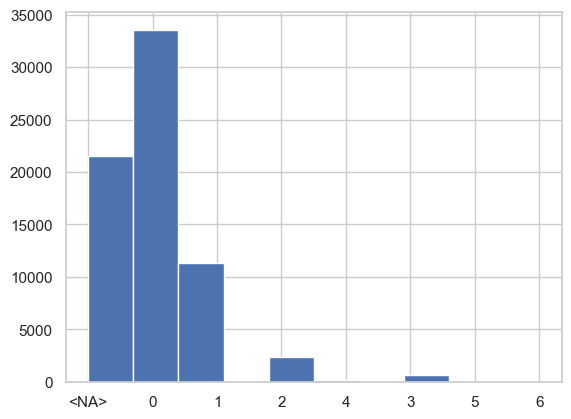

In [322]:
# Convert float values to strings and remove decimal places
data['RCRI score'] = data['RCRI score'].astype('Int64')
data['RCRI score'] = data['RCRI score'].astype(str)
data['RCRI score'].hist(bins=10)

In [323]:
data['RCRI score'].value_counts()

RCRI score
0       33558
<NA>    21504
1       11367
2        2367
3         670
4         166
5          33
6           2
Name: count, dtype: int64

### Review pairplot for predictors

In [324]:
# Replace '<NA>' strings with NaN in the 'RCRI_score' column
data['RCRI score'] = data['RCRI score'].replace('<NA>', np.nan)

In [325]:
subset = data[['RCRI score', 'SurgRiskCategory', 'CHFRCRICategory', 'CVARCRICategory']]
subset1 = subset.loc[(~subset['RCRI score'].isnull())]
subset1.rename(columns={'RCRI score': 'RCRI_score'}, inplace=True)
subset1.head()

/var/folders/cw/kl_62dc55m98jwry7cttqyyr0000gn/T/ipykernel_42548/3152462398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1.rename(columns={'RCRI score': 'RCRI_score'}, inplace=True)


,RCRI_score,SurgRiskCategory,CHFRCRICategory,CVARCRICategory
4,0,Low,no,no
8,0,Moderate,no,no
9,1,Moderate,no,no
10,0,Low,no,no
11,1,Moderate,no,no


In [326]:
subset1['RCRI_score'].value_counts(normalize=True)

RCRI_score
0    0.696759
1    0.236011
2    0.049146
3    0.013911
4    0.003447
5    0.000685
6    0.000042
Name: proportion, dtype: float64

In [327]:
col = 'SurgRiskCategory'
target_col = 'RCRI_score'
crosstab = pd.crosstab(subset1[col], subset1[target_col], normalize='index')
crosstab

RCRI_score,0,1,2,3,4,5,6
SurgRiskCategory,,,,,,,
High,0.210349,0.592764,0.145141,0.042491,0.007573,0.001683,0.000000
Low,0.821379,0.131483,0.032697,0.011015,0.002862,0.000477,0.000087
Moderate,0.621183,0.304761,0.055795,0.013861,0.003608,0.000792,0.000000


In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_proportions(subset1):
    '''Plot proportion of RCRI_score counts in each category normalized across RCRI_score categories'''
    
    # Define the target column
    target_col = 'RCRI_score'
    
    # Get the list of other columns to plot against the target
    other_cols = [col for col in subset1.columns if col != target_col]
    
    # Set the plot style
    sns.set(style="whitegrid")
    
    # Create a proportion plot for each categorical variable
    for col in other_cols:
        # Create a cross-tabulation of the categorical column and the target column
        crosstab = pd.crosstab(subset1[col], subset1[target_col], normalize='columns')
        
        # Plot the proportions using a stacked bar plot
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
        
        # Set the title and labels
        plt.title(f'Proportion Plot of {col} by {target_col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        
        # Add a legend
        plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Adjust the layout and show the plot
        plt.tight_layout()
        plt.show()

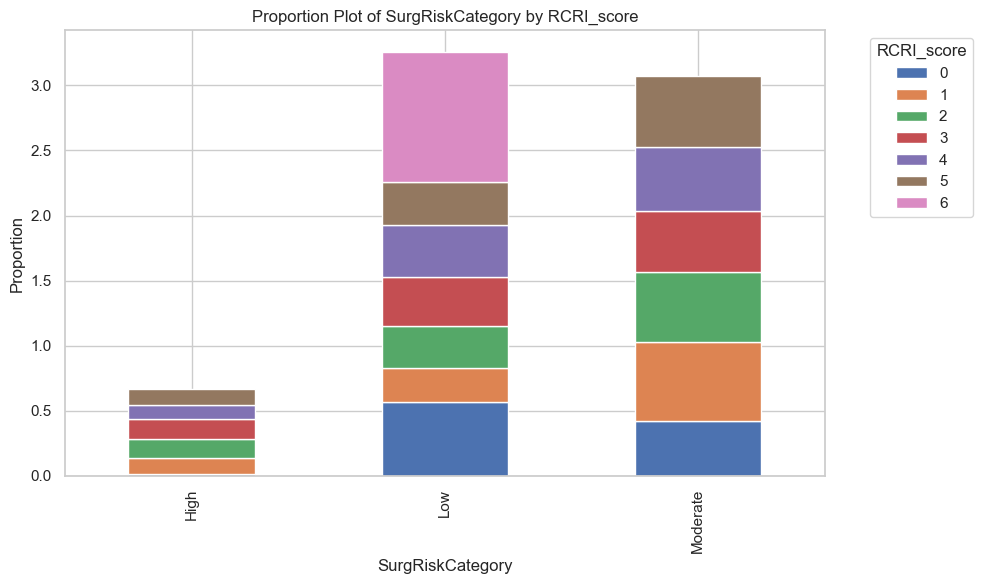

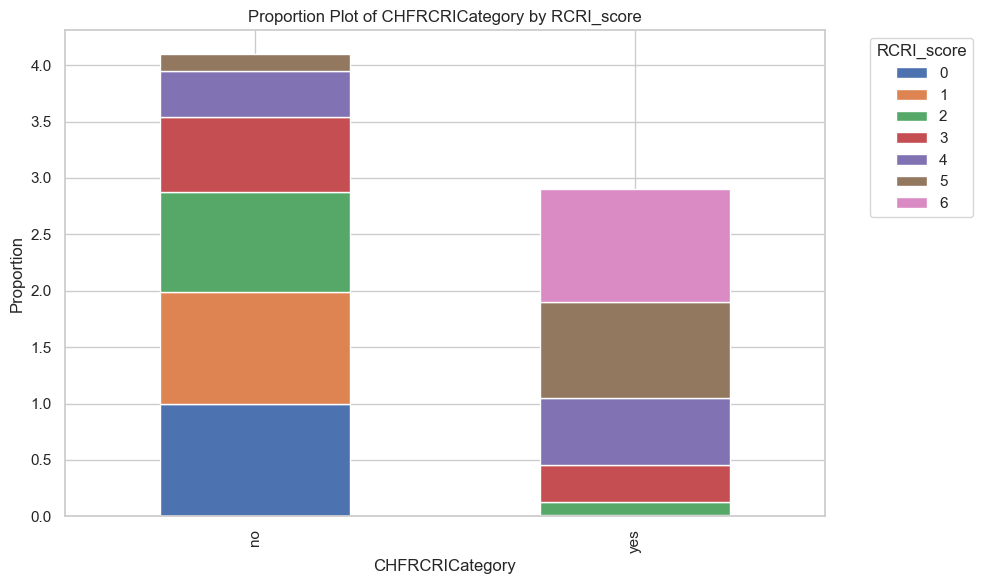

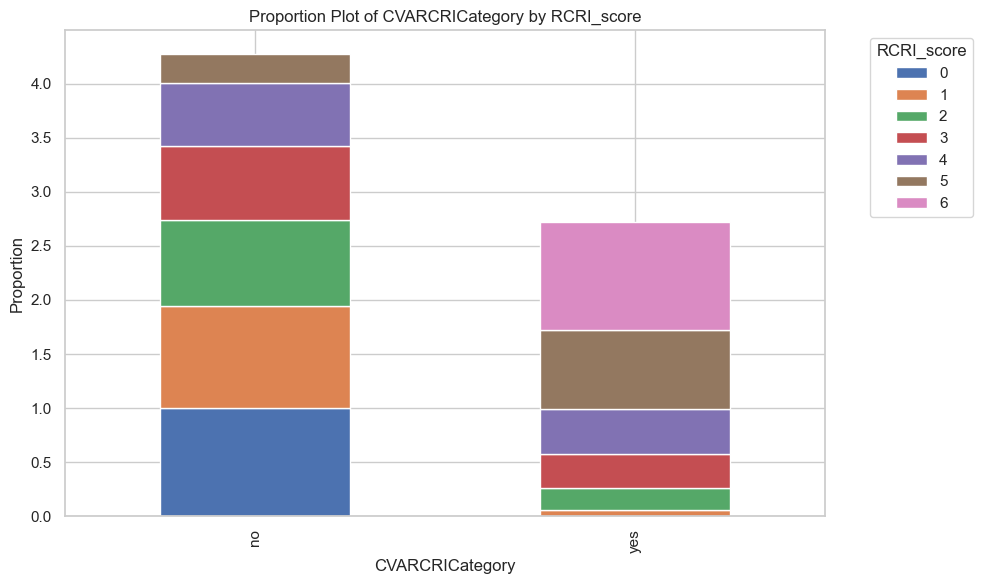

In [329]:
plot_categorical_proportions(subset1)

### Findings: 
- Drop 'SurgRiskCategory' as predictor as no clear r/s is seen. 
- Clear relationships seen for other risk factors 'CHFRCRICategory', 'CVARCRICategory'. 
- Train simple RF model on remaining categories for imputation. 

In [330]:
subset2 = subset1.drop('SurgRiskCategory', axis=1)
subset2.head()

,RCRI_score,CHFRCRICategory,CVARCRICategory
4,0,no,no
8,0,no,no
9,1,no,no
10,0,no,no
11,1,no,no


### Run imputations with simple RF model. 
- Fit to subset2 (records with non-missing RCRI_scores) for training
- Run inference on records with missing RCRI_scores
- Impute to dataset. 

In [331]:
df = data.copy()

In [332]:
df['RCRI score'].isnull().sum()

21504

In [333]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def impute_rcri_score(subset2, data):
    # Rename the column 'RCRI score' to 'RCRI_score' in both dataframes
    subset2.rename(columns={'RCRI score': 'RCRI_score'}, inplace=True)
    data.rename(columns={'RCRI score': 'RCRI_score'}, inplace=True)
    
    # Define the features and target column
    features = ['CHFRCRICategory', 'CVARCRICategory']
    target_col = 'RCRI_score'
    
    # Separate features and target in subset2
    X = subset2[features]
    y = subset2[target_col]
    
    # Set up the one-hot encoder
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), features)
        ]
    )
    
    # Define the Random Forest model with class weights
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    
    # Create a pipeline that first applies one-hot encoding then trains the Random Forest model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', rf)
    ])
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model on the validation set
    y_val_pred = pipeline.predict(X_val)
    print("Validation Set Classification Report:")
    print(classification_report(y_val, y_val_pred))
    
    # Identify rows with missing 'RCRI_score' in the data
    missing_rcri_score = data[target_col].isnull()
    
    # Prepare features for rows with missing 'RCRI_score'
    X_missing = data.loc[missing_rcri_score, features]
    
    # Impute the missing values using the trained pipeline
    imputed_rcri_scores = pipeline.predict(X_missing)
    
    # Impute the missing values in the original data
    data.loc[missing_rcri_score, target_col] = imputed_rcri_scores
    
    return data

In [334]:
data = impute_rcri_score(subset2, data)

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      6698
           1       0.00      0.00      0.00      2296
           2       0.00      0.00      0.00       477
           3       0.00      0.00      0.00       129
           4       0.05      0.58      0.08        31
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0

    accuracy                           0.70      9633
   macro avg       0.11      0.23      0.13      9633
weighted avg       0.51      0.70      0.59      9633



/Users/jinkettyee/opt/anaconda3/envs/playground_py_3_9_15/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jinkettyee/opt/anaconda3/envs/playground_py_3_9_15/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jinkettyee/opt/anaconda3/envs/playground_py_3_9_15/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

In [335]:
df['RCRI score'].isnull().sum()

21504

In [336]:
df['RCRI score'].value_counts()

RCRI score
0    33558
1    11367
2     2367
3      670
4      166
5       33
6        2
Name: count, dtype: int64

In [337]:
data['RCRI_score'].isnull().sum()

0

In [338]:
data['RCRI_score'].value_counts()

RCRI_score
0    55021
1    11367
2     2367
3      670
4      206
5       33
6        3
Name: count, dtype: int64

In [339]:
data.columns

Index(['GENDER', 'RCRI_score', 'Anemia category',
       'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days',
       'Transfusionintraandpostop', 'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'RaceCategory',
       'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory',
       'DMinsulinRCRICategory', 'CreatinineRCRICategory',
       'GradeofKidneyCategory', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h'],
      dtype='object')

In [340]:
# Define categorical, numeric & target columns
# Define the target columns
target_cols = ['ICUAdmgt24h', 'thirtydaymortality', 'Mortality']

# Select categorical columns and exclude target columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols = [col for col in cat_cols if col not in target_cols]

# Select numerical columns and exclude target columns
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col not in target_cols]

In [341]:
# Function to calculate the percentage of missing data for given columns
def calculate_missing_data_percentage(data, columns):
    missing_data = data[columns].isnull().mean() * 100
    return missing_data

# Calculate the percentage of missing data for target columns
missing_target_cols = calculate_missing_data_percentage(data, target_cols)
print("Percentage of missing data in target columns:")
print(missing_target_cols)

# Calculate the percentage of missing data for categorical columns
missing_cat_cols = calculate_missing_data_percentage(data, cat_cols)
print("\nPercentage of missing data in categorical columns:")
print(missing_cat_cols)

# Calculate the percentage of missing data for numerical columns
missing_num_cols = calculate_missing_data_percentage(data, num_cols)
print("\nPercentage of missing data in numerical columns:")
print(missing_num_cols)

Percentage of missing data in target columns:
ICUAdmgt24h           0.0
thirtydaymortality    0.0
Mortality             0.0
dtype: float64

Percentage of missing data in categorical columns:
GENDER                               0.000000
RCRI_score                           0.000000
Anemia category                      0.000000
AnaestypeCategory                    0.000000
PriorityCategory                     0.000000
TransfusionIntraandpostopCategory    0.000000
AGEcategory                          0.000000
SurgRiskCategory                     0.000000
RaceCategory                         0.000000
CVARCRICategory                      0.000000
IHDRCRICategory                      0.000000
CHFRCRICategory                      0.000000
DMinsulinRCRICategory                0.000000
CreatinineRCRICategory               0.000000
GradeofKidneyCategory                0.000000
RDW15.7                              0.000000
ASAcategorybinned                    4.933469
dtype: float64

Percentage 

### 'ASAcategorybinned'
- **Definition:** The American Society of Anesthesiologists Physical Status classification system (ASA PS) is a method of characterizing patient operative risk on a scale of 1-5, where 1 is normal health and 5 is moribund. Every anesthesiologist is trained in this measure, and it is performed before every procedure in which a patient undergoes anesthesia. We measured the independent predictive value of ASA-PS for complications and mortality in the ACS-NSQIP database by multivariate regression. We conducted analogous regressions after standardizing ASA-PS to control for interprocedural variations in risk in the overall model and sub-analyses by surgical specialty and the most common procedures.
- Paper: https://pubmed.ncbi.nlm.nih.gov/25937154/, https://www.asahq.org/standards-and-practice-parameters/statement-on-asa-physical-status-classification-system
- **Insights:** Seems like Age & Cardiac-associated factors are linked to ASA PS scores for patients.
- Explore Correlations of ASA PS scores with variables: 'AGEcategory', 'RCRI_score'

In [342]:
data['ASAcategorybinned'].value_counts(normalize=True)

ASAcategorybinned
II       0.564759
I        0.226287
III      0.193296
IV-VI    0.015658
Name: proportion, dtype: float64

In [343]:
data['ASAcategorybinned'].dtypes

dtype('O')

In [344]:
subset = data.loc[~data['ASAcategorybinned'].isnull()][['AGEcategory','ASAcategorybinned', 'RCRI_score']]
subset.head()

,AGEcategory,ASAcategorybinned,RCRI_score
2,50-64,I,0
3,65-74,I,0
4,65-74,II,0
5,50-64,I,0
6,30-49,II,0


In [345]:
subset['AGEcategory'].value_counts()

AGEcategory
50-64    21117
30-49    18276
65-74    12647
18-29     6520
75-84     6452
>=85      1218
Name: count, dtype: int64

In [350]:
col = 'AGEcategory'
target_col = 'ASAcategorybinned'
crosstab = pd.crosstab(subset[col], subset[target_col], normalize='index')
crosstab

ASAcategorybinned,I,II,III,IV-VI
AGEcategory,,,,
18-29,0.555828,0.395245,0.041871,0.007055
30-49,0.386244,0.514664,0.090337,0.008755
50-64,0.163802,0.622200,0.199555,0.014443
65-74,0.055586,0.640705,0.284020,0.019688
75-84,0.019994,0.564941,0.383912,0.031153
>=85,0.010673,0.438424,0.488506,0.062397


In [346]:
# explore age as a predictor of ASA PS scores
def plot_categorical_proportions(subset1):
    '''Plot proportion of RCRI_score counts in each category normalized across RCRI_score categories'''
    
    # Define the target column
    target_col = 'ASAcategorybinned'
    
    # Get the list of other columns to plot against the target
    other_cols = [col for col in subset1.columns if col != target_col]
    
    # Set the plot style
    sns.set(style="whitegrid")
    
    # Create a proportion plot for each categorical variable
    for col in other_cols:
        # Create a cross-tabulation of the categorical column and the target column
        crosstab = pd.crosstab(subset1[col], subset1[target_col], normalize='index')
        
        # Plot the proportions using a stacked bar plot
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
        
        # Set the title and labels
        plt.title(f'Proportion Plot of {col} by {target_col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        
        # Add a legend
        plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Adjust the layout and show the plot
        plt.tight_layout()
        plt.show()

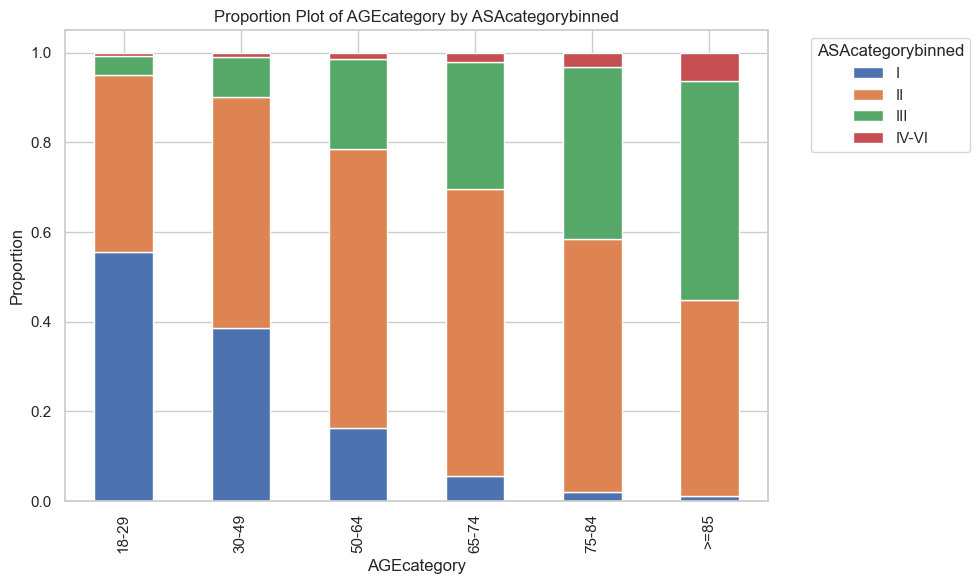

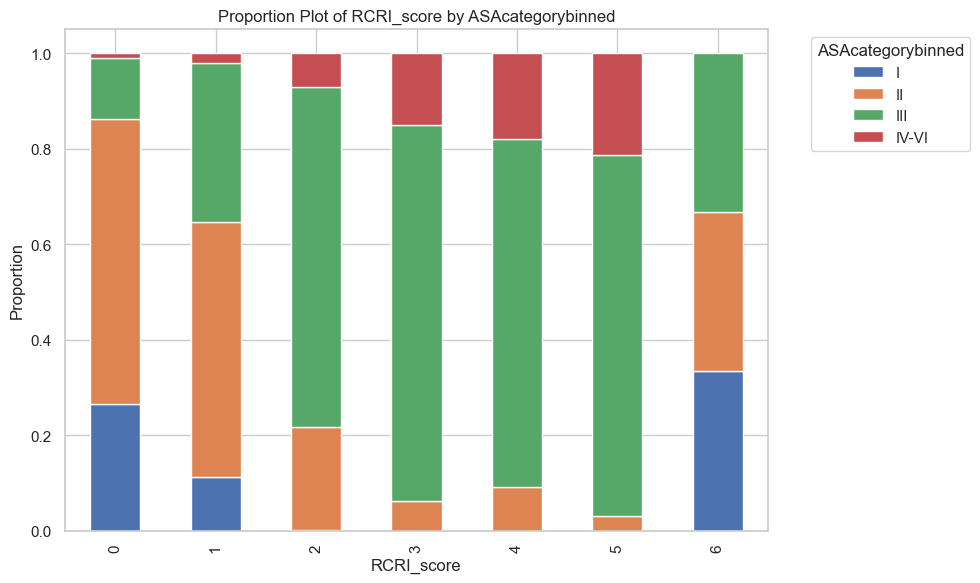

In [347]:
plot_categorical_proportions(subset)

#### Findings
- Age category seems to be a strong determinant of ASA PS scores.
- *I.E. When age category increases, normalized (age) proportions of lower bound scores (ASA PS of I & II) gradually decreases while proportions of upper bounds (III & IV-VI) gradually increases. 
- Impute ASA PS scores based on normalized %s across age categories. 
- Only consider this imputation method because missing % is low (~4.9%)

In [348]:
subset.drop('RCRI_score', axis=1, inplace=True)
subset.head()

,AGEcategory,ASAcategorybinned
2,50-64,I
3,65-74,I
4,65-74,II
5,50-64,I
6,30-49,II


### Probabilistic imputation

In [351]:
import pandas as pd
import numpy as np

def impute_missing_values(data, crosstab, age_col='AGEcategory', target_col='ASAcategorybinned'):
    """
    Impute missing values in the target column based on the crosstab probabilities.

    Parameters:
    - data (pd.DataFrame): The main dataset with missing values to be imputed.
    - crosstab (pd.DataFrame): Normalized crosstab with probabilities of each ASAcategorybinned given AGEcategory.
    - age_col (str): The name of the column in data representing age categories.
    - target_col (str): The name of the column in data to impute.

    Returns:
    - pd.DataFrame: The dataset with missing values imputed.
    """
    
    # Ensure the target column exists in the DataFrame
    if target_col not in data.columns:
        raise ValueError(f"{target_col} not found in data columns.")
    
    # Ensure the age column exists in the DataFrame
    if age_col not in data.columns:
        raise ValueError(f"{age_col} not found in data columns.")
    
    # Get the unique age categories
    age_categories = crosstab.index
    
    # Define a function to impute values based on age category
    def impute_row(row):
        if pd.isna(row[target_col]):
            age_category = row[age_col]
            if age_category in age_categories:
                probabilities = crosstab.loc[age_category].values
                choices = crosstab.columns
                imputed_value = np.random.choice(choices, p=probabilities)
                return imputed_value
            else:
                # If age category is not found in crosstab, return NaN or a default value
                return np.nan
        else:
            return row[target_col]
    
    # Apply the imputation function to each row
    data[target_col] = data.apply(impute_row, axis=1)
    
    return data

In [352]:
col = 'AGEcategory'
target_col = 'ASAcategorybinned'
crosstab = pd.crosstab(subset[col], subset[target_col], normalize='index')
df = data.copy()
impute_missing_values(data, crosstab, age_col='AGEcategory', target_col='ASAcategorybinned')

,GENDER,RCRI_score,Anemia category,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,PriorityCategory,TransfusionIntraandpostopCategory,...,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h
2,FEMALE,0,mild,0.0,0.0,0.0,0.0,GA,Elective,0 units,...,Chinese,no,no,no,no,no,G1,<= 15.7,I,no
3,MALE,0,moderate/severe,0.0,1.0,0.0,1.0,GA,Elective,1 unit,...,Chinese,no,no,no,no,no,G1,<= 15.7,I,no
4,MALE,0,mild,0.0,0.0,0.0,0.0,GA,Elective,0 units,...,Chinese,no,no,no,no,no,G1,>15.7,II,no
5,MALE,0,none,0.0,0.0,0.0,0.0,GA,Emergency,0 units,...,Indian,no,no,no,no,no,G1,<= 15.7,I,no
6,FEMALE,0,none,0.0,0.0,0.0,0.0,GA,Elective,0 units,...,Chinese,no,no,no,no,no,G2,<= 15.7,II,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73195,MALE,0,none,0.0,0.0,0.0,0.0,GA,Elective,0 units,...,Others,no,no,no,no,no,G2,<= 15.7,II,no
73196,FEMALE,0,none,0.0,0.0,0.0,0.0,GA,Elective,0 units,...,Others,no,no,no,no,no,G3,<= 15.7,II,no
73198,FEMALE,2,mild,0.0,0.0,0.0,0.0,GA,Elective,0 units,...,Others,no,no,no,yes,no,G3,<= 15.7,II,no
73199,MALE,1,moderate/severe,0.0,0.0,0.0,0.0,GA,Emergency,0 units,...,Others,no,no,no,yes,no,G1,<= 15.7,II,no


In [353]:
data['ASAcategorybinned'].isnull().sum()

0

In [354]:
df['ASAcategorybinned'].value_counts()

ASAcategorybinned
II       37404
I        14987
III      12802
IV-VI     1037
Name: count, dtype: int64

In [355]:
data['ASAcategorybinned'].value_counts()

ASAcategorybinned
II       39286
I        15870
III      13420
IV-VI     1091
Name: count, dtype: int64

In [356]:
# Define categorical, numeric & target columns
# Define the target columns
target_cols = ['ICUAdmgt24h', 'thirtydaymortality', 'Mortality']

# Select categorical columns and exclude target columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols = [col for col in cat_cols if col not in target_cols]

# Select numerical columns and exclude target columns
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col not in target_cols]

In [357]:
# Function to calculate the percentage of missing data for given columns
def calculate_missing_data_percentage(data, columns):
    missing_data = data[columns].isnull().mean() * 100
    return missing_data

# Calculate the percentage of missing data for target columns
missing_target_cols = calculate_missing_data_percentage(data, target_cols)
print("Percentage of missing data in target columns:")
print(missing_target_cols)

# Calculate the percentage of missing data for categorical columns
missing_cat_cols = calculate_missing_data_percentage(data, cat_cols)
print("\nPercentage of missing data in categorical columns:")
print(missing_cat_cols)

# Calculate the percentage of missing data for numerical columns
missing_num_cols = calculate_missing_data_percentage(data, num_cols)
print("\nPercentage of missing data in numerical columns:")
print(missing_num_cols)

Percentage of missing data in target columns:
ICUAdmgt24h           0.0
thirtydaymortality    0.0
Mortality             0.0
dtype: float64

Percentage of missing data in categorical columns:
GENDER                               0.0
RCRI_score                           0.0
Anemia category                      0.0
AnaestypeCategory                    0.0
PriorityCategory                     0.0
TransfusionIntraandpostopCategory    0.0
AGEcategory                          0.0
SurgRiskCategory                     0.0
RaceCategory                         0.0
CVARCRICategory                      0.0
IHDRCRICategory                      0.0
CHFRCRICategory                      0.0
DMinsulinRCRICategory                0.0
CreatinineRCRICategory               0.0
GradeofKidneyCategory                0.0
RDW15.7                              0.0
ASAcategorybinned                    0.0
dtype: float64

Percentage of missing data in numerical columns:
Preoptransfusionwithin30days    0.0
Intraop    

In [359]:
len(data)

69667

In [358]:
data.to_csv('../data/CARES_data_imputedv1.csv', index=False)